In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Set Pandas display options to show all columns and rows while printing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# import data
df = pd.read_csv('../data/IEEE_2024_positioning_evaluation.csv')

In [5]:
# delta between predicted and reference
df['Dx'] = df['Xestimated[m]'] - df['Xgt[m]']
df['Dy'] = df['Yestimated[m]'] - df['Ygt[m]']
df['Dz'] = df['Zestimated[m]'] - df['Zgt[m]']

In [6]:
df.head(5)

,image,setup,Trunk-Cam_dist[mm],ObjType,Position,Xgt[m],Ygt[m],Zgt[m],Xestimated[m],Yestimated[m],Zestimated[m],Manhattan[m],Euclidean[m],Dx,Dy,Dz
0,color_1_2_1.png,2D,1531.0,Apple,1,0.471,0.054,1.864,0.471,0.051,1.904,0.04,0.040000,0.0,-0.003,0.04
1,color_1_2_1.png,2D,1531.0,Apple,2,0.000,0.055,1.865,0.000,0.042,1.915,0.08,0.063246,0.0,-0.013,0.05
2,color_1_2_1.png,2D,1531.0,Apple,3,-0.470,0.054,1.864,-0.470,0.051,1.884,0.02,0.020000,0.0,-0.003,0.02
3,color_1_2_1.png,2D,1531.0,Apple,4,0.471,0.054,1.564,0.471,0.041,1.604,0.05,0.041231,0.0,-0.013,0.04
4,color_1_2_1.png,2D,1531.0,Apple,5,0.000,0.055,1.565,0.000,0.053,1.605,0.05,0.041231,0.0,-0.002,0.04


In [7]:
# chunks
# 2D
df_2D = df.loc[df['setup'] == '2D'].copy()
df_2D_apples = df.loc[(df['setup'] == '2D') & (df['ObjType'] == 'Apple')].copy()
df_2D_tennisballs = df.loc[(df['setup'] == '2D') & (df['ObjType'] == 'Tennis_ball')].copy()

# 3d
df_3D = df.loc[df['setup'] == '3D'].copy()
df_3D_apples = df.loc[(df['setup'] == '3D') & (df['ObjType'] == 'Apple')].copy()
df_3D_tennisballs = df.loc[(df['setup'] == '3D') & (df['ObjType'] == 'Tennis_ball')].copy()

In [8]:
df_2D_apples.describe()

,Trunk-Cam_dist[mm],Position,Xgt[m],Ygt[m],Zgt[m],Xestimated[m],Yestimated[m],Zestimated[m],Manhattan[m],Euclidean[m],Dx,Dy,Dz
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.0,396.000000,396.000000
mean,1532.545455,8.000000,-0.000098,0.055848,1.266076,-0.000098,0.038793,1.298374,0.051086,0.040287,0.0,-0.017056,0.032298
std,9.853892,4.288932,0.384759,0.009869,0.422994,0.384759,0.012360,0.431450,0.018421,0.013405,0.0,0.014464,0.013890
min,1511.000000,1.000000,-0.476000,0.033000,0.660000,-0.476000,0.000000,0.652000,0.010000,0.010000,0.0,-0.059000,-0.010000
25%,1528.000000,4.000000,-0.468250,0.051000,0.962000,-0.468250,0.030000,0.982000,0.040000,0.030000,0.0,-0.027250,0.020000
50%,1535.000000,8.000000,0.000000,0.057000,1.264500,0.000000,0.040000,1.305000,0.050000,0.040000,0.0,-0.017000,0.030000
75%,1538.000000,12.000000,0.468000,0.062000,1.564000,0.468000,0.050000,1.613000,0.060000,0.050000,0.0,-0.007000,0.040000
max,1549.000000,15.000000,0.476000,0.073000,1.880000,0.476000,0.062000,1.949000,0.100000,0.072801,0.0,0.019000,0.070000


In [9]:
df_3D_apples.describe()

,Trunk-Cam_dist[mm],Position,Xgt[m],Ygt[m],Zgt[m],Xestimated[m],Yestimated[m],Zestimated[m],Manhattan[m],Euclidean[m],Dx,Dy,Dz
count,241.000000,241.000000,240.000000,240.000000,240.00000,241.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,1530.298755,13.024896,-0.002100,0.148900,1.24650,-0.002203,0.127921,1.302792,0.086208,0.065074,0.001000,-0.020979,0.056292
std,9.895809,7.116838,0.322418,0.116155,0.42615,0.321286,0.126007,0.429200,0.025239,0.016667,0.012232,0.023161,0.016643
min,1517.000000,2.000000,-0.473000,0.045000,0.62000,-0.473000,0.020000,0.670000,0.020000,0.020000,-0.020000,-0.071000,0.020000
25%,1524.000000,7.000000,-0.265500,0.071000,0.93500,-0.272000,0.040000,0.982500,0.070000,0.053136,0.000000,-0.037000,0.050000
50%,1531.000000,13.000000,0.000000,0.092500,1.23650,0.000000,0.060000,1.301000,0.090000,0.067082,0.000000,-0.024000,0.060000
75%,1538.000000,19.000000,0.207500,0.206000,1.55350,0.170000,0.196500,1.621750,0.110000,0.077134,0.000000,-0.006000,0.060000
max,1552.000000,25.000000,0.475000,0.499000,1.87900,0.475000,0.482000,1.939000,0.140000,0.104403,0.050000,0.060000,0.100000


## positioning error related to dimensionality (2D, 3D)

In [10]:
# Define the list of dataframes
dataframes = {
    '2D': df_2D,
    '2D_TB': df_2D_tennisballs,
    '3D_TB': df_3D_tennisballs,

    '3D': df_3D,
    '2D_apples': df_2D_apples,
    '3D_apples': df_3D_apples,
}

results = []

# Iterate through the dataframes and calculate RMSE values
for name, df_chunk in dataframes.items():
    
    rmse_manhattan = np.sqrt(np.sum(df_chunk['Manhattan[m]'] ** 2) / df_chunk['Manhattan[m]'].count())
    rmse_euclidean = np.sqrt(np.sum(df_chunk['Euclidean[m]'] ** 2) / df_chunk['Euclidean[m]'].count())

    results.append([name, rmse_manhattan, rmse_euclidean])

# Create a DataFrame from the results
rmse_df = pd.DataFrame(results, columns=['DataFrame', 'RMSE_Manhattan', 'RMSE_Euclidean'])

print(np.round(rmse_df, 3))


   DataFrame  RMSE_Manhattan  RMSE_Euclidean
0         2D           0.054           0.043
1      2D_TB           0.061           0.051
2      3D_TB           0.044           0.039
3         3D           0.083           0.063
4  2D_apples           0.054           0.042
5  3D_apples           0.090           0.067


In [11]:
# Add a new column to differentiate between 2D and 3D
rmse_df['Dimension'] = rmse_df['DataFrame'].apply(lambda x: '2D' if '2D' in x else '3D')
rmse_df['Object'] = rmse_df['DataFrame'].apply(lambda x: 'apple' if 'apples' in x else 'TB')

grouped_df = rmse_df.iloc[:, 1:-1].groupby('Dimension').mean()
grouped_df

,RMSE_Manhattan,RMSE_Euclidean
Dimension,,
2D,0.056743,0.045368
3D,0.072104,0.056136


## positioning error related to object type (Apple, Tennis ball)

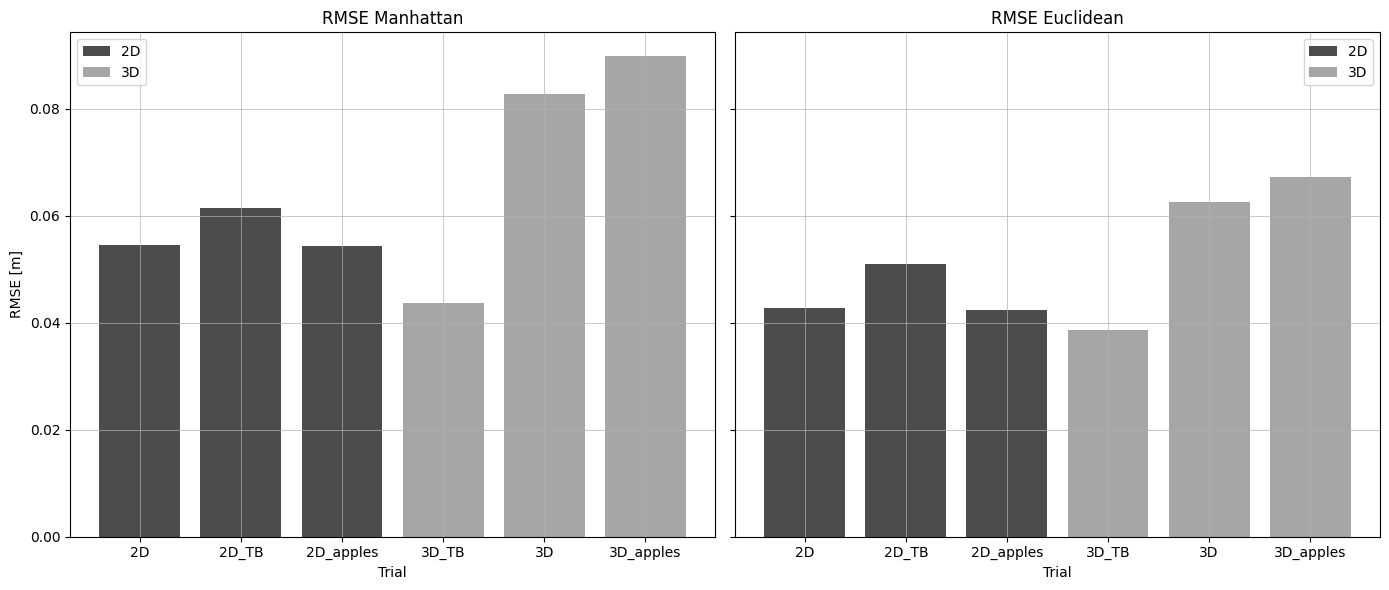

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].grid(lw=.5)
axes[1].grid(lw=.5)


# Histogram for RMSE_Manhattan
for dimension, color in zip(['2D', '3D'], ['k', 'gray']):
    subset = rmse_df[rmse_df['Dimension'] == dimension]
    axes[0].bar(subset['DataFrame'], subset['RMSE_Manhattan'], color=color, label=dimension, alpha=0.7)

# Histogram for RMSE_Euclidean
for dimension, color in zip(['2D', '3D'], ['k', 'gray']):
    subset = rmse_df[rmse_df['Dimension'] == dimension]
    axes[1].bar(subset['DataFrame'], subset['RMSE_Euclidean'], color=color, label=dimension, alpha=0.7)


axes[0].set_title('RMSE Manhattan')
axes[0].set_xlabel('Trial')
axes[0].set_ylabel('RMSE [m]')
axes[0].legend()

axes[1].set_title('RMSE Euclidean')
axes[1].set_xlabel('Trial')
axes[1].legend()


plt.tight_layout()

plt.savefig('../docs/images/results.png', dpi=400)
plt.show()


In [13]:
mean_errors = rmse_df.groupby('Object')[['RMSE_Manhattan', 'RMSE_Euclidean']].mean().reset_index()
mean_errors

,Object,RMSE_Manhattan,RMSE_Euclidean
0,TB,0.060608,0.048724
1,apple,0.072055,0.054810


In [14]:
grouped_df = rmse_df.iloc[:, 1:].groupby(['Object', 'Dimension']).mean()
grouped_df

RMSE_Manhattan  RMSE_Euclidean
Object Dimension                                
TB     2D               0.057965        0.046826
       3D               0.063250        0.050621
apple  2D               0.054298        0.042453
       3D               0.089812        0.067166

## positioning error related to single positions

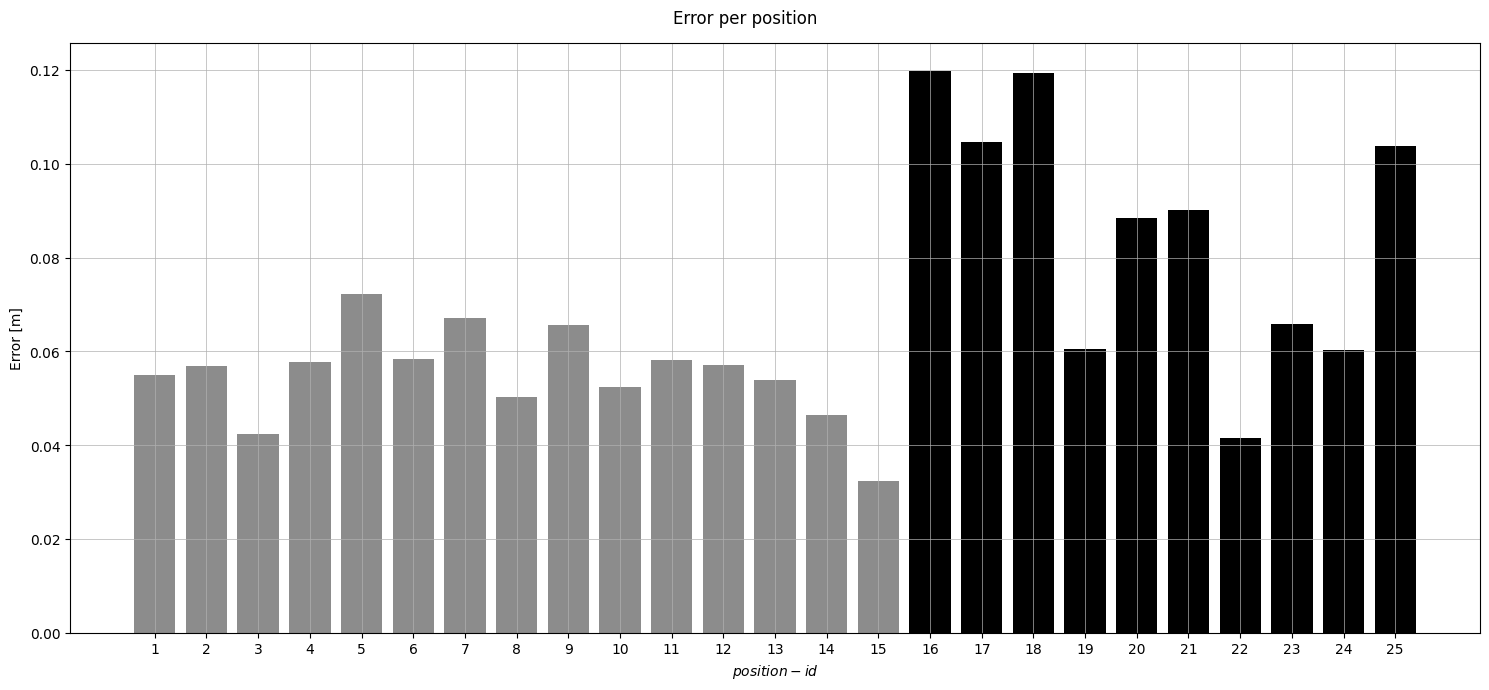

[1 - 15] mean :  0.0550
[16 - 25] mean :  0.0854


In [15]:
plt.figure(figsize=(15, 7))

plt.grid(lw = .5)



pos_1_15 = []
pos_16_25 = []

for pos in df['Position'].unique():

    df_pos = df.loc[df['Position'] == pos].copy()
    avg_error_x = np.sum(df_pos['Dx']) / len(df_pos)
    avg_error_y = np.sum(df_pos['Dy']) / len(df_pos)
    avg_error_z = np.sum(df_pos['Dz']) / len(df_pos)

    sum_error = np.abs(avg_error_x) + np.abs(avg_error_y) + np.abs(avg_error_z)  # this error is a manhattan error

    if pos <= 15:
        pos_1_15.append(sum_error)
        plt.bar(pos - 1, sum_error, color='gray', alpha=.9)
    else:
        pos_16_25.append(sum_error)
        plt.bar(pos - 1, sum_error, color='k', alpha=1)

plt.xlabel('$position-id$')
plt.ylabel('Error [m]')
plt.suptitle('Error per position')

# Set ticks to each group
plt.xticks(ticks=np.arange(len(df['Position'].unique())), labels=df['Position'].unique())

plt.tight_layout()

plt.savefig('../docs/images/positioning_errors-related_to_position.png', dpi=400)

plt.show()


print(f'[1 - 15] mean : {np.mean(pos_1_15) : .4f}')
print(f'[16 - 25] mean : {np.mean(pos_16_25) : .4f}')


## positioning error related to single axes

In [16]:
df.head(5)

,image,setup,Trunk-Cam_dist[mm],ObjType,Position,Xgt[m],Ygt[m],Zgt[m],Xestimated[m],Yestimated[m],Zestimated[m],Manhattan[m],Euclidean[m],Dx,Dy,Dz
0,color_1_2_1.png,2D,1531.0,Apple,1,0.471,0.054,1.864,0.471,0.051,1.904,0.04,0.040000,0.0,-0.003,0.04
1,color_1_2_1.png,2D,1531.0,Apple,2,0.000,0.055,1.865,0.000,0.042,1.915,0.08,0.063246,0.0,-0.013,0.05
2,color_1_2_1.png,2D,1531.0,Apple,3,-0.470,0.054,1.864,-0.470,0.051,1.884,0.02,0.020000,0.0,-0.003,0.02
3,color_1_2_1.png,2D,1531.0,Apple,4,0.471,0.054,1.564,0.471,0.041,1.604,0.05,0.041231,0.0,-0.013,0.04
4,color_1_2_1.png,2D,1531.0,Apple,5,0.000,0.055,1.565,0.000,0.053,1.605,0.05,0.041231,0.0,-0.002,0.04


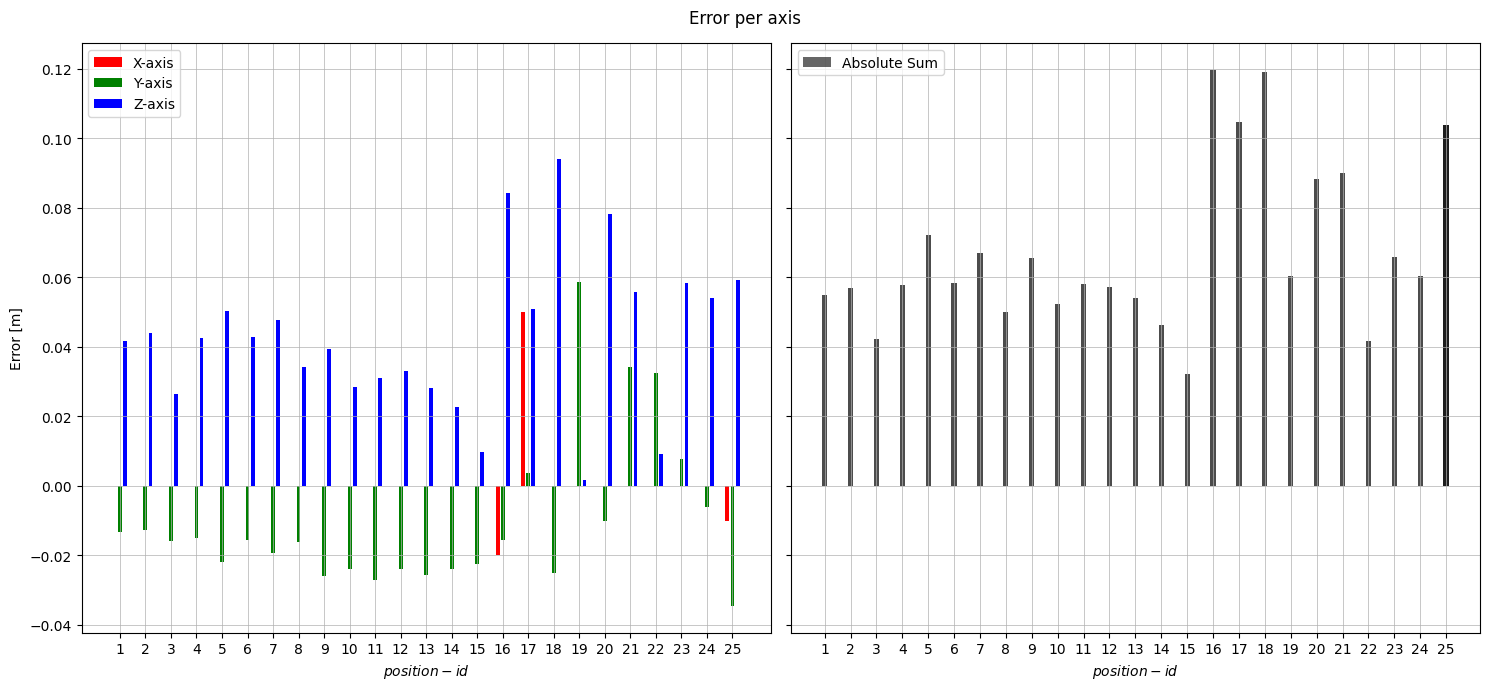

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
ax[0].grid(lw=.5)
ax[1].grid(lw=.5)


for pos in df['Position'].unique():

    df_pos = df.loc[df['Position'] == pos].copy()
    avg_error_x = np.sum(df_pos['Dx']) / len(df_pos)
    avg_error_y = np.sum(df_pos['Dy']) / len(df_pos)
    avg_error_z = np.sum(df_pos['Dz']) / len(df_pos)
    sum_error = np.abs(avg_error_x) + np.abs(avg_error_y) + np.abs(avg_error_z)

    ax[0].bar(pos - 1.2, avg_error_x, width=0.15, color='r')
    ax[0].bar(pos - 1, avg_error_y, width=0.15, color='g')
    ax[0].bar(pos - 0.8, avg_error_z, width=0.15, color='b')
    ax[1].bar(pos - 1, sum_error, width=0.2, color='k', alpha=.7)

ax[0].bar(pos - 1.2, avg_error_x, width=0.15, color='r', label='X-axis')
ax[0].bar(pos - 1, avg_error_y, width=0.15, color='g', label='Y-axis')
ax[0].bar(pos - 0.8, avg_error_z, width=0.15, color='b', label='Z-axis')
ax[1].bar(pos - 1, sum_error, width=0.2, color='k', alpha=.6, label='Absolute Sum')


ax[0].set_xlabel('$position-id$')
ax[1].set_xlabel('$position-id$')
ax[0].set_ylabel('Error [m]')
plt.suptitle('Error per axis')

# Set ticks to each group
ax[0].set_xticks(ticks=np.arange(len(df['Position'].unique())), labels=df['Position'].unique())
ax[1].set_xticks(ticks=np.arange(len(df['Position'].unique())), labels=df['Position'].unique())

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
plt.tight_layout()

plt.savefig('../docs/images/error_per_axis.png', dpi=400)

plt.show()


mean error per each axis (not focused on position)

In [18]:
x = []
y = []
z = []
avg = []

for pos in df['Position'].unique():

    df_pos = df.loc[df['Position'] == pos].copy()
    x.append(abs(np.sum(df_pos['Dx']) / len(df_pos)))
    y.append(abs(np.sum(df_pos['Dy']) / len(df_pos)))
    z.append(abs(np.sum(df_pos['Dz']) / len(df_pos)))

print(f'X: {np.mean(x) : .4f}')
print(f'Y: {np.mean(y) : .4f}')
print(f'Z: {np.mean(z) : .4f}')

X:  0.0032
Y:  0.0213
Z:  0.0427
